In [1]:
# import sys
# sys.path.append("../")
# sys.path.append("../ride/")

import matplotlib.pyplot as plt

# Импорт модулей
from ride.plot_functions import (plot_city_results, 
                                 plot_theoretical_acceleration)
from tests import city_tests
from ride.utils import DataGetter

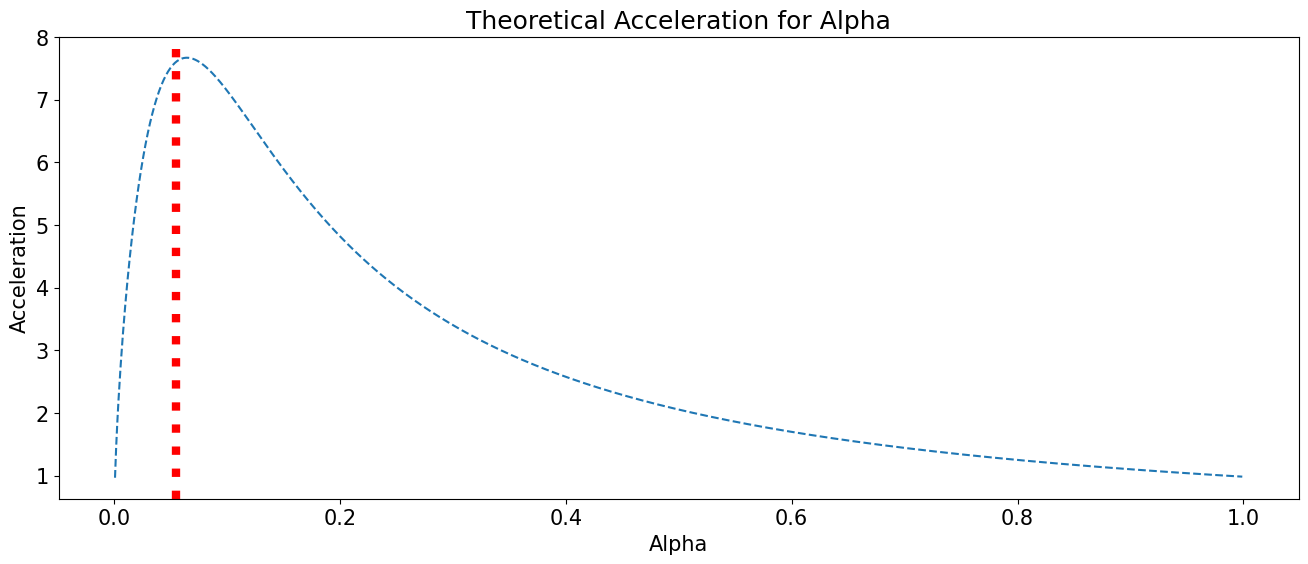

In [9]:
id = '44915' # or 'R44915'
graph = DataGetter.download_graph(id=id)
N = graph.number_of_nodes()
plot_theoretical_acceleration(N, (16,6))

In [ ]:
H = city_tests.test_graph(graph, f'{id}', id, logs=True, alg='dijkstra', alpha_range=(0.04, 0.1))

In [7]:
plt.rc('legend', fontsize=15)
plt.rcParams.update({'font.size': 15})
plt.rcParams['text.usetex'] = False
plt.style.use({'figure.facecolor': 'white'})

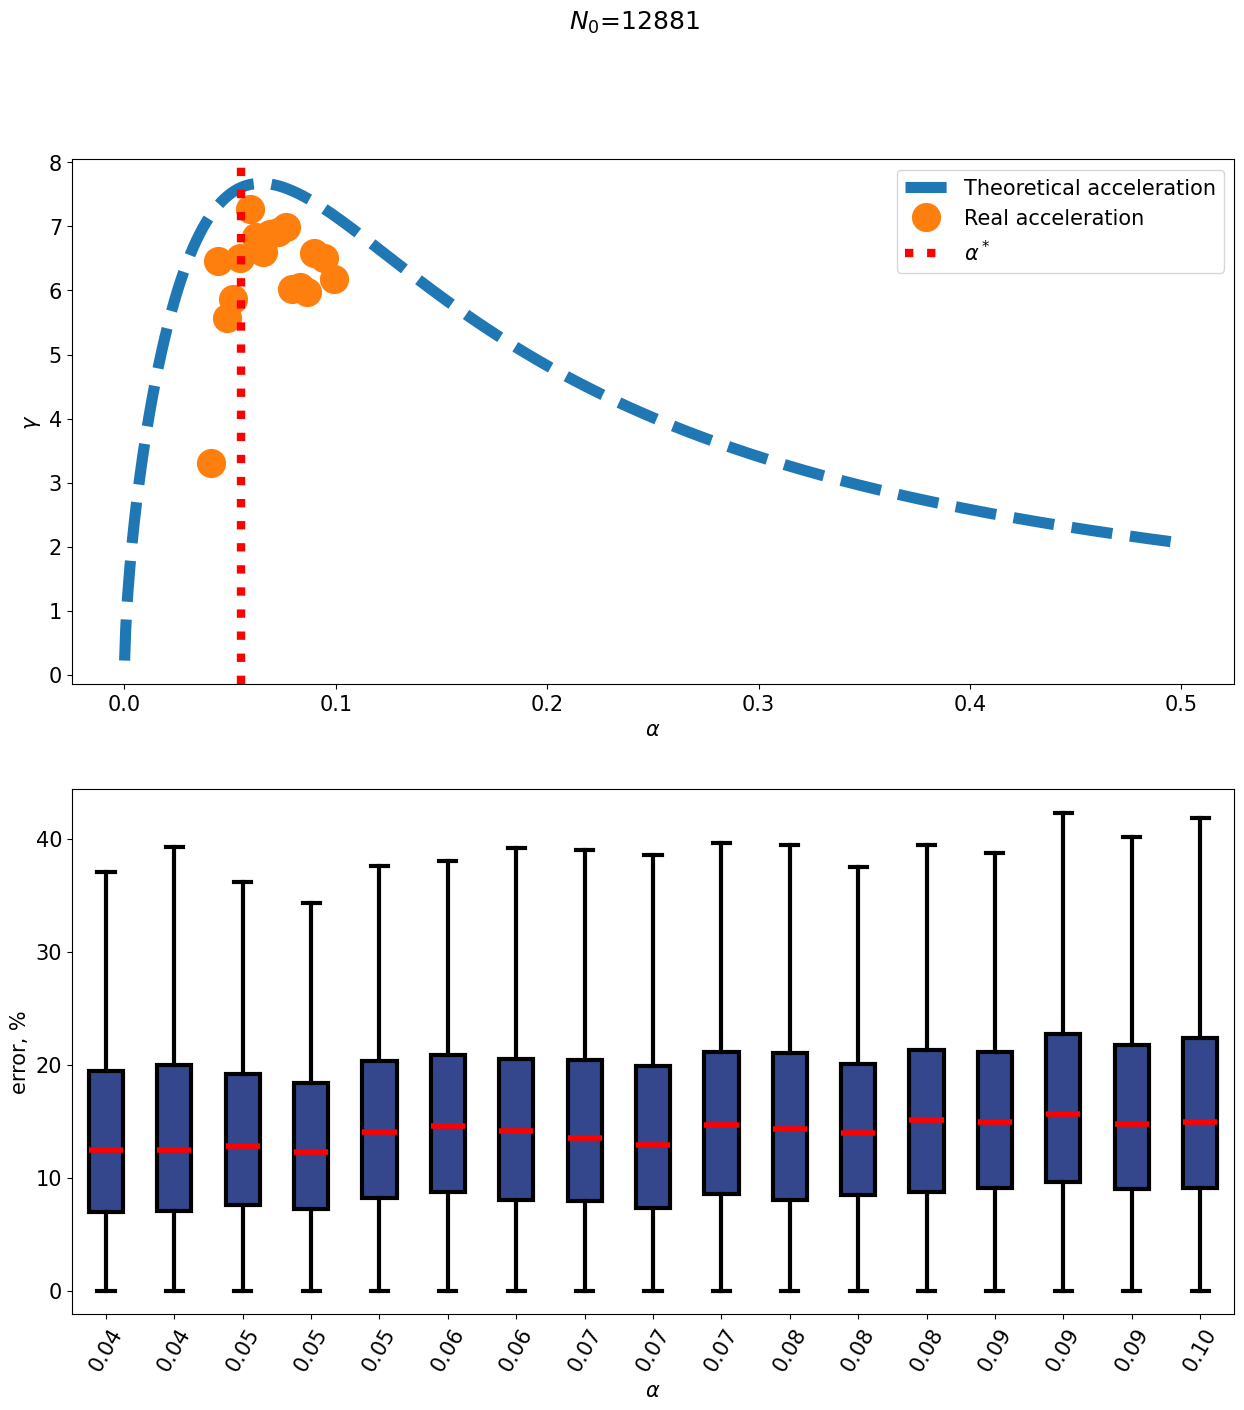

In [8]:
plot_city_results(H, H.nodes, alpha_threshold=None)